<a href="https://colab.research.google.com/github/zainab-khan12/Game/blob/main/ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pheromone Evaporation
pheromones *= (1 - EVAPORATION_RATE)  # Reduce all pheromone values

# Pheromone Reinforcement
for ant, solution in enumerate(solutions):
    for task, vm in enumerate(solution):
        pheromones[task][vm] += 1 / solution_costs[ant]  # Better solutions get more pheromone

NameError: name 'pheromones' is not defined

In [3]:
import random
import numpy as np

# Define parameters
NUM_ANTS = 10
NUM_VMS = 5
NUM_TASKS = 20
EVAPORATION_RATE = 0.5
ALPHA = 1  # Influence of pheromone
BETA = 2   # Influence of heuristic
ITERATIONS = 100

# Initialize pheromone levels (small positive values)
pheromones = np.ones((NUM_TASKS, NUM_VMS)) * 0.1

# Define VM capacities (random values for simulation)
vm_capacities = np.random.randint(50, 150, size=NUM_VMS)

# Define task demands (random values for simulation)
task_demands = np.random.randint(10, 50, size=NUM_TASKS)

# Heuristic information (inverse of VM load)
def heuristic(vm_loads):
    return 1 / (vm_loads + 1e-6)  # Prevent division by zero

# Ant Colony Optimization for Load Balancing
def aco_load_balancing():
    global pheromones
    best_solution = None
    best_cost = float('inf')

    for _ in range(ITERATIONS):
        vm_loads = np.zeros(NUM_VMS)
        solutions = []

        for _ in range(NUM_ANTS):
            solution = []
            for task in range(NUM_TASKS):
                probabilities = (pheromones[task] ** ALPHA) * (heuristic(vm_loads) ** BETA)
                probabilities /= np.sum(probabilities)
                chosen_vm = np.random.choice(NUM_VMS, p=probabilities)
                solution.append(chosen_vm)
                vm_loads[chosen_vm] += task_demands[task]
            solutions.append(solution)

        # Evaluate solutions
        solution_costs = [max([sum(task_demands[i] for i in range(NUM_TASKS) if sol[i] == vm) for vm in range(NUM_VMS)]) for sol in solutions]

        # Update best solution
        min_cost = min(solution_costs)
        if min_cost < best_cost:
            best_cost = min_cost
            best_solution = solutions[np.argmin(solution_costs)]

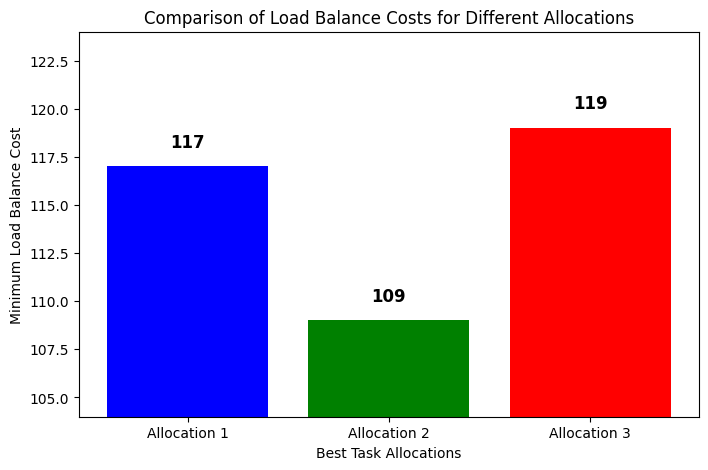

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
allocations = ["Allocation 1", "Allocation 2", "Allocation 3"]
load_costs = [117, 109, 119]  # Minimum Load Balance Costs

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(allocations, load_costs, color=['blue', 'green', 'red'])

# Labels and Title
plt.xlabel("Best Task Allocations")
plt.ylabel("Minimum Load Balance Cost")
plt.title("Comparison of Load Balance Costs for Different Allocations")
plt.ylim(min(load_costs) - 5, max(load_costs) + 5)  # Adjust y-axis for clarity

# Show values on bars
for i, cost in enumerate(load_costs):
    plt.text(i, cost + 1, str(cost), ha='center', fontsize=12, fontweight='bold')

# Show Graph
plt.show()